# Diabetes Prediction

Various Health Care professionals are interesting in predicting diabetes for the patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.
Besides Health Care professionals pharmaceutical companies are also interested in predicting the patients contacting diabetes so that they can do customer profiling.

In this project we will specifically focus on predicting Diabetes on the basis of various predictors. For this we will compare Accuracy score of various models and pick the most accurate model.

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The full data set can be seen at the following page: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Assignment has been broken into 4 Parts
1. Data Cleaning
2. EDA
3. Supervised Learning
4. Model Result Comparison and Summary

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.metrics import f1_score

## Data Cleaning

Data Cleaning step is very important as most of the further operations can only be done on Tidy data. In this Part we will analyse the Data Types, correct them if needed, and find the None values.

For the Null Values, if a Predictor has less than 5% Observation values as Null we will impute the values with the Mean, Median, or Mode, as necessary. And for the Predictors having more null values, we will remove them after careful consideration. (In such cases if we have high amount of null value but still want to use that Predictor it will be better to go back to Data Cleaning Step)


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

After looking at the default data type below we adjusted them so that predictors such as age and blood_glucose_level appears properly.

We also preliminary checked the None values.

In [4]:
df['age'] = df['age'].astype(int)

In [5]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [9]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

While there does not seem to be any null value. After checking the object types, especiall the smoking_history we were able to find 35,816 rows where we have No info. 

While No Info also represent a dimension of information we can not impute it if more than 30% of the Observations have None value. If Health Care experts believe that it is an essential predictor, they will have to improve the collection method so that the information can be captured properly.

We can indeed remove smoking history as it has high none value.

In [6]:
df = df.drop(columns = 'smoking_history')

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df['blood_glucose_level'] =  df['blood_glucose_level'].astype(float)

In [9]:
df.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

We are finished with Data Cleaning process for the Diabetes Prediction Dataset. Blow are the final columns and their data types.
Age is a discrete variable here, hence we converted it into int type and blood_glucose_level is a continuous variable, and thus it was converted into float.


## Exploratory Data Analysis(EDA)

During the EDA part we will draw various plots, extract descriptive statistics, and analyze preliminary relationships across the different Columns of the Data Set.

We will start with basic descriptive statistics.

In [17]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


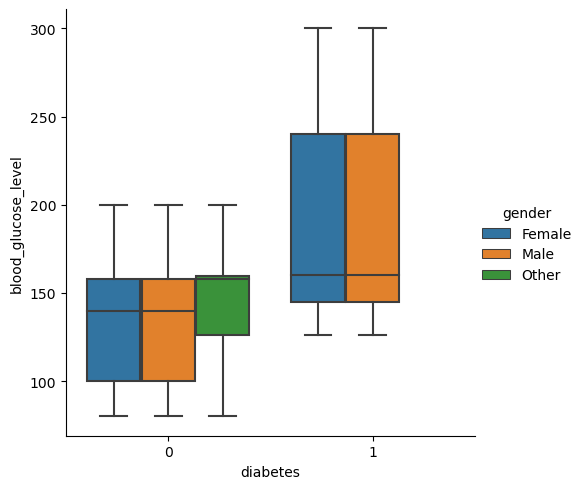

In [19]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

Box Plot for Diabetes Vs Blood Glucose Level seems same for all the genders, Other Gender looks different in first glance but it can be due to the reason that only 18 entries were availaible for them in the dataset.

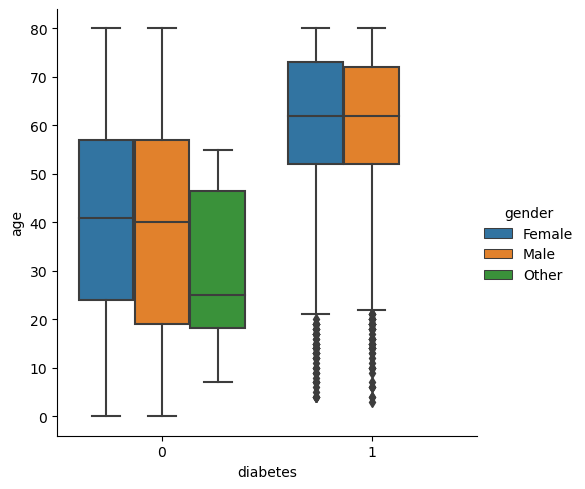

In [20]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

From the above boxplot for Diabetes vs Age we can see that most of the patients with Diabetes have high Median Age and generally higher age with a few outliers where people under 20 also have diabetes.

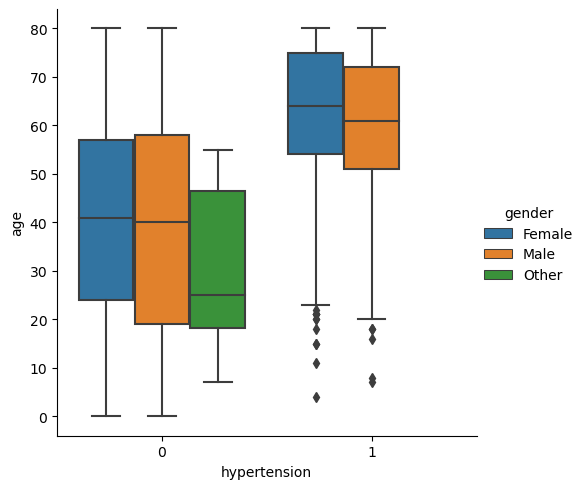

In [73]:
sns.catplot(data = df, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

Hypertension Vs Age boxplot based on the Gender appear similar to the Diabetes Vs Age, which was expected because generally most patients for Diabetes have high Median age and around age the likelihood of the Hypertension also increase naturally. Age can be called as a confounding factor here.

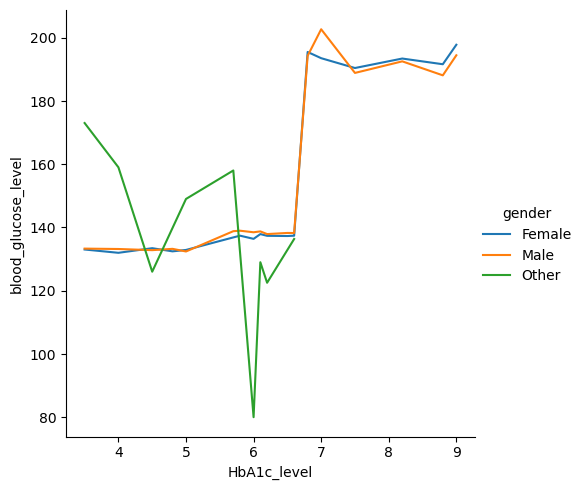

In [67]:
sns.relplot(data = df, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

HbA1c Level and Blood Glucose Level for both Male and Female gender appears same. 
While other gender may look like that it has different shape it may be due to the fact that only 18 observations of such types were recorded.

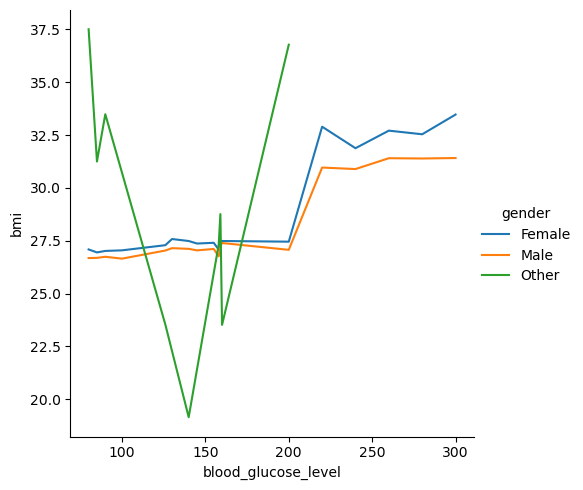

In [72]:
sns.relplot(data = df, x = 'blood_glucose_level', y =  'bmi', kind = 'line', hue = 'gender', ci = None)
plt.show()

BMI for Female appears to be more than Male for each level of blood_glucose_level.

Again we got abnormal result for Others. This may be due to the fact that only 18 observations were recorded representing them.

In [74]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


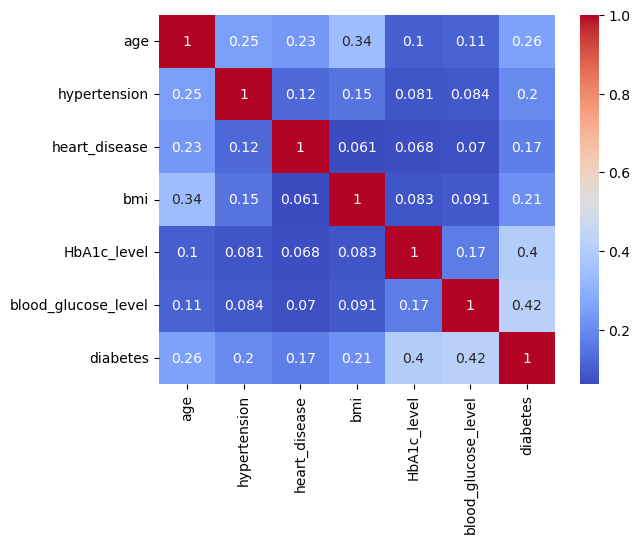

In [78]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Finally from the Heatmap we can see that there does not exist an evidence for collinearity prima facie.

While there can be multicollinearity, we would need the help of subject matter expert to find it as there is no high correlation, that is > 0.7, in our given data set with which we can find collinearity.

Overall there are no correlations across the predictors and we can use the data for various models

## Models : Supervised Learning

In [167]:
design_matrix = df.iloc[:,:-1]
design_matrix = pd.get_dummies(design_matrix, columns= ['gender'], drop_first=True)
response_y = df.iloc[:,-1]
train_x, test_x, train_y, test_y = train_test_split(design_matrix, response_y, test_size = 0.2, random_state = 110)

In [168]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(80000, 8)
(20000, 8)
(80000,)
(20000,)


In [25]:
design_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
0,80,0,1,25.19,6.6,140.0,0,0
1,54,0,0,27.32,6.6,80.0,0,0
2,28,0,0,27.32,5.7,158.0,1,0
3,36,0,0,23.45,5.0,155.0,0,0
4,76,1,1,20.14,4.8,155.0,1,0
...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90.0,0,0
99996,2,0,0,17.37,6.5,100.0,0,0
99997,66,0,0,27.83,5.7,155.0,1,0
99998,24,0,0,35.42,4.0,100.0,0,0


In [169]:
response_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [170]:
train_x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
92937,0,0,0,18.14,5.0,85.0,1,0
76194,66,0,0,27.32,4.0,155.0,0,0
93411,27,0,0,34.50,6.1,130.0,1,0
57862,1,0,0,10.62,3.5,200.0,1,0
12047,51,0,0,41.53,6.0,158.0,1,0


In [171]:
train_y

92937    0
76194    0
93411    0
57862    0
12047    0
        ..
39293    0
42255    0
34877    0
75491    0
2176     1
Name: diabetes, Length: 80000, dtype: int64

In [203]:
scores = dict()
time_models = dict()
f1 = dict()

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [204]:
#Logistic Regression is based on 8 Predictors only and since there was no correlation across the predictors there will be 
#no need of Feature selection for the Logistic Regression

t0 = time.time()
lr_model = LogisticRegression(solver='liblinear', random_state = 110).fit(train_x, train_y)
t1 = time.time()
print('Model Runnign Time',t1-t0)

lr_score = lr_model.score(test_x, test_y)
scores['Logistic Regression'] = lr_score
print(lr_score)
time_models['Logistic Regression'] = t1-t0
f1['Logistic Regression'] = f1_score(test_y, lr_model.predict(test_x))

Model Runnign Time 0.6322290897369385
0.9607


### Random Forest

In [176]:
#Note: Grid Search will take too much time. I was able to wait but since the model below is made of the best parameters from
#Grid Search you can try and adjust the model to test if they are true best parameter

# paras_rf = {'n_estimators':[10,20,30,40,50,100], 'min_samples_leaf' : [2,3,5,8,10], 'max_features': ['sqrt', 'log2'], 'max_depth':[5,10,15,20,30]}
# grid = GridSearchCV(RF(), paras_rf).fit(train_x, train_y)

In [205]:
t0 = time.time()
rf_model = RF(n_estimators = 30, min_samples_leaf = 8, max_features='sqrt', max_depth = 5,  random_state = 110).fit(train_x, train_y)
t1 = time.time()

print('Model Runnign Time',t1-t0)
print('Score', rf_model.score(test_x, test_y))
time_models['Random Forest'] = t1-t0
scores['Random Forest'] = rf_model.score(test_x, test_y)
f1['Random Forest'] = f1_score(test_y, rf_model.predict(test_x))

Model Runnign Time 1.3437528610229492
Score 0.97185


## Adaboost

In [41]:
#Grid Search is very time consuming and may take a lot of time. Please proceed with caution if you want to test it
#Moreover n_estimators = 100 and learning_rate = 0.5 was the best parameters. To get them it took me 1 hour and when I
#tried increased range of learning rates it was too time consuming that's why n_estimators have been taken as 100 below to
#skip at least one parameter

#paras_ada = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,1.2,1.4,2,3]}
#grid = GridSearchCV(AdaBoostClassifier(n_estimators = 100), paras_ada).fit(train_x#, train_y)
#grid.best_params_

In [206]:
t0 = time.time()
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state = 110).fit(train_x, train_y)
t1 = time.time()
print('Model Runnign Time',t1-t0)
time_models['Ada Boost'] = t1-t0
f1['Ada Boost'] = f1_score(test_y, ada_model.predict(test_x))

Model Runnign Time 6.602018117904663


In [207]:
print('Score',ada_model.score(test_x, test_y))
scores['Ada Boost'] = ada_model.score(test_x, test_y)

Score 0.9724


### Multinomial Naive Bayes

In [208]:
from sklearn.naive_bayes import MultinomialNB
t0 = time.time()
naive_multimonial_model = MultinomialNB().fit(train_x, train_y)
t1 = time.time()
print('Model Runnign Time',t1-t0)
time_models['Multinomial Naive Bayes'] = t1-t0
print('Score',naive_multimonial_model.score(test_x, test_y))
scores['Multinomial Naive Bayes'] = naive_multimonial_model.score(test_x, test_y)
f1['Multinomial Naive Bayes'] = f1_score(test_y, naive_multimonial_model.predict(test_x))

Model Runnign Time 0.025429964065551758
Score 0.905


### Gaussian Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB
t0 = time.time()
naive_guass_model = GaussianNB().fit(train_x, train_y)
t1 = time.time()
print('Model Runnign Time',t1-t0)
time_models['Gaussian Naive Bayes'] = t1-t0
print('Score',naive_guass_model.score(test_x, test_y))
scores['Gaussian Naive Bayes'] = naive_guass_model.score(test_x, test_y)
f1['Gaussian Naive Bayes'] = f1_score(test_y, naive_guass_model.predict(test_x))

Model Runnign Time 0.030307531356811523
Score 0.89155


## Linear Support Vector Machine

In [210]:
#Note, any other option for the parameter for the linear SVC is not applicable as number of predictors are quite less
#I was not even able to run SVC function because of this.
t0 = time.time()
svm_model = LinearSVC(dual=False, random_state = 110).fit(train_x, train_y)
t1 = time.time()
print('Model Runnign Time',t1-t0)
time_models['Linear Support Vector Machine'] = t1-t0
print('Score',svm_model.score(test_x, test_y))
scores['Linear Support Vector Machine'] = svm_model.score(test_x, test_y)
f1['Linear Support Vector Machine'] = f1_score(test_y, svm_model.predict(test_x))

Model Runnign Time 0.47667932510375977
Score 0.96125


## Model Result Comparison and Summary

Now we have created various models while optimizing their Hyperparameters for the Diabetes Prediction. We are now equipped to suggest the model which will be most useful to use the users like Health Care Professionals.

To analyse the result in a tabular form we will create a full DataFrame with Models, Scores(Accuracy), Time, and F1 Scores.

In [190]:
scores

{'Logistic Regression': 0.9607,
 'Ada Boost': 0.9724,
 'Gaussian Naive Bayes': 0.89155,
 'Multinomial Naive Bayes': 0.905,
 'Linear Support Vector Machine': 0.96125,
 'Random Forest': 0.97185}

In [189]:
time_models

{'Logistic Regression': 0.4453287124633789,
 'Ada Boost': 5.711139917373657,
 'Gaussian Naive Bayes': 0.031018733978271484,
 'Multinomial Naive Bayes': 0.02396368980407715,
 'Linear Support Vector Machine': 0.30946803092956543,
 'Random Forest': 0.6640145778656006}

In [191]:
f1

{'Logistic Regression': 0.7192857142857143,
 'Ada Boost': 0.8032786885245903,
 'Multinomial Naive Bayes': 0.3223965763195435,
 'Gaussian Naive Bayes': 0.5382158824781775,
 'Linear Support Vector Machine': 0.7186932849364791,
 'Random Forest': 0.7969707897583843}

In [211]:
result_df = pd.DataFrame({'Models': scores.keys(), 'Scores':scores.values(), 'Time':time_models.values(), 'F1':f1.values()})

In [212]:
result_df

,Models,Scores,Time,F1
0,Logistic Regression,0.96070,0.632229,0.719286
1,Random Forest,0.97185,1.343753,0.796971
2,Ada Boost,0.97240,6.602018,0.803279
3,Multinomial Naive Bayes,0.90500,0.025430,0.322397
4,Gaussian Naive Bayes,0.89155,0.030308,0.538216
5,Linear Support Vector Machine,0.96125,0.476679,0.718693


In [199]:
result_df.sort_values('Scores', ascending = False)

,Models,Scores,Time,F1
1,Ada Boost,0.97240,5.711140,0.803279
5,Random Forest,0.97185,0.664015,0.796971
4,Linear Support Vector Machine,0.96125,0.309468,0.718693
0,Logistic Regression,0.96070,0.445329,0.719286
3,Multinomial Naive Bayes,0.90500,0.023964,0.538216
2,Gaussian Naive Bayes,0.89155,0.031019,0.322397


In [201]:
#Confusion Matrix for the Best Model, Adaboost

confusion_matrix(test_y, ada_model.predict(test_x))

array([[18321,    11],
       [  541,  1127]], dtype=int64)

In the Result Data frame we have Scores, time taken, and F1 values.

Scores measure the Accuracy for the Test Data Set.

Time taken reders to the Time taken for 1 iteration of the model. More complex model takes more time.

F1 Score is a representative of Precision and Recall. High F1 Score means higher of both of them and is considered optimum for a model.

From the sorted result we can pick Adaboost Model which has highest accuracy of 0.97240 and highest F1 value at 0.803279. Howeve, while it appears as the best model we must also take into account the time taken for the Adaboost is the highest at 5.7 seconds, and this time is for only 1 iteration as if we use the grid search and other optimization Adaboost is taking most time here.

Overall, our problem was predicting the Diabetes Patients and Adaboost model is the best Predictor with the accuracy of 0.97240 among all the 6 Tested Model. If we want utmost prediction we recommend Adaboost, however if slight amount of Accuracy can be sacrificed Random Forest appears to be a competent Model for our problem, it is taking only fraction of time as compared to Adaboost and has high accuracy rate of 0.97185 and high F1 score of 0.7969 which are only a few points below the result metrics of the best model, Adaboost.